<a id='top'></a>
# Student Performance data and visualisation
> This data was gotten from kaggle and contains information on students and their performance in an exam. Each student is grades based on math, reading and writing. There are other additional information for the students such as race, parental level of education, lunch and test preparation.

> Link to dataset : https://www.kaggle.com/datasets/adithyabshetty100/student-performance
> I will be performing some analysis and visualisation to find the relationship between different features in the dataset.

- <a href = '#barplot'>Bar Plots</a>
- <a href = '#pieplot'>Pie Plots</a>
- <a href = '#boxplot'>Box Plots</a>
- <a href = '#scatterplot'>Scatter Plots</a>

In [1]:
print('Greetings World! I am Mary')

Greetings World! I am Mary


In [2]:
#using pandas and matplotlib
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
#read dataset to pandas dataframe
perform =pd.read_csv('stuperform.csv')
perform

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
#get the shape of the dataset
perform.shape

(1000, 8)

In [5]:
#check for duplicates
perform.duplicated().sum()

0

In [6]:
#check for missing or empty data
perform.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
#summary of dataset
perform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
#renaming the columns
perform = perform.rename(columns = {'race/ethnicity' : 'race_ethnicity', 'test preparation course' : 'test_prep', 'math score' : 'math_score','reading score' : 'reading_score', 'writing score' : 'writing_score', 'parental level of education' : 'parental_level_of_education'})

In [9]:
#Test 
perform.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_prep,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
#brief statistics on numerical data in the dataset
perform.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Plots
>The visualisations will be done here 

<a id = 'barplot'></a>
# Bar plots

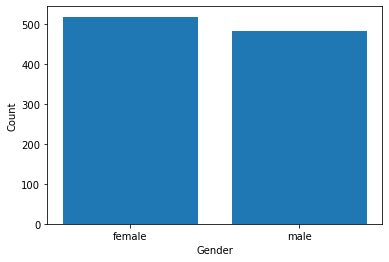

In [11]:
#get the labels for the plot
x = perform['gender'].unique()

#count of the labels
y = perform['gender'].value_counts(sort = False)

plt.bar(x,y)

plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

There are more female students than male students

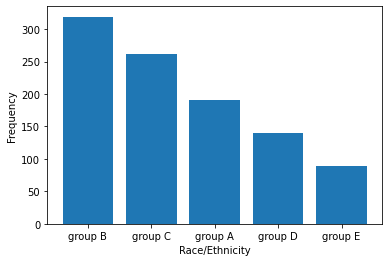

In [12]:
#Plotting the race of the students
x = perform['race_ethnicity'].unique()
y = perform['race_ethnicity'].value_counts(sort = True)

plt.bar(x,y)
plt.xlabel('Race/Ethnicity')
plt.ylabel('Frequency')

plt.show()

This shows that there are more students from group B race than other races.

In [13]:
#To get the aggregate of the scores for each gender and race
grouped = perform.groupby(['gender','race_ethnicity'])
grouped.agg([np.sum,np.mean, np.std])

math_score                       reading_score  \
                             sum       mean        std           sum   
gender race_ethnicity                                                  
female group A              2107  58.527778  14.157252          2484   
       group B              6386  61.403846  16.256750          7392   
       group C             11166  62.033333  15.007224         12950   
       group D              8417  65.248062  14.174157          9552   
       group E              4886  70.811594  16.269129          5233   
male   group A              3378  63.735849  14.520742          3272   
       group B              5670  65.930233  14.156928          5405   
       group C              9398  67.611511  14.090037          9094   
       group D              9232  69.413534  13.094139          8796   
       group E              5449  76.746479  14.298570          4991   

                                            writing_score             \
                            mean        std           sum       mean   
gender race_ethnicity                                                  
female group A         69.000000  14.847799          2443  67.861111   
       group B         71.076923  14.612598          7285  70.048077   
       group C         71.944444  13.900574         12920  71.777778   
       group D         74.046512  13.914842          9678  75.023256   
       group E         75.840580  15.349481          5212  75.536232   
male   group A         61.735849  15.451103          3135  59.150943   
       group B         62.848837  14.695752          5179  60.220930   
       group C         65.424460  13.291590          8717  62.712230   
       group D         66.135338  12.765829          8700  65.413534   
       group E         70.295775  13.966689          4785  67.394366   

                                  
                             std  
gender race_ethnicity             
female group A         14.652455  
       group B         14.891439  
       group C         14.806595  
       group D         13.866814  
       group E         15.703671  
male   group A         15.137061  
       group B         14.854907  
       group C         13.647341  
       group D         13.262574  
       group E         13.449885

In [14]:
female = perform.query("gender == 'female'")
female

,gender,race_ethnicity,parental_level_of_education,lunch,test_prep,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
...,...,...,...,...,...,...,...,...
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


<a id ='pieplot'></a>
# Pie plots 

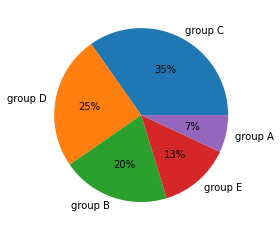

In [15]:
#Checking the race percentage for the female population
femrace = female['race_ethnicity'].value_counts()
plt.pie(femrace, labels = femrace.index, autopct = '%0.0f%%')
plt.show()

There are more females in group C compared to other races

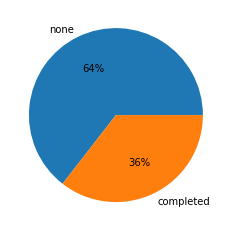

In [16]:
femtest = female['test_prep'].value_counts()
plt.pie(femtest, labels = femtest.index, autopct = '%0.0f%%')
plt.show()

A significant portion of the females did not take the test preparation course

In [17]:
male = perform.query("gender == 'male'")
male

,gender,race_ethnicity,parental_level_of_education,lunch,test_prep,math_score,reading_score,writing_score
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
10,male,group C,associate's degree,standard,none,58,54,52
...,...,...,...,...,...,...,...,...
985,male,group A,high school,standard,none,57,51,54
987,male,group E,some high school,standard,completed,81,75,76
990,male,group E,high school,free/reduced,completed,86,81,75
994,male,group A,high school,standard,none,63,63,62


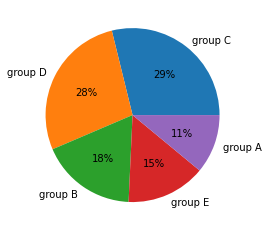

In [18]:
#Checking the race percentage for the male population
malerace = male['race_ethnicity'].value_counts()
plt.pie(malerace, labels = malerace.index, autopct = '%0.0f%%')
plt.show()

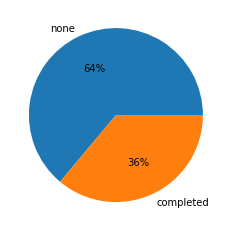

In [19]:
maletest = male['test_prep'].value_counts()
plt.pie(maletest, labels = maletest.index, autopct = '%0.0f%%')
plt.show()

Likewise, a significant portion of the males did not take the test preparation course

<a id = 'boxplot'></a>
# Boxplots

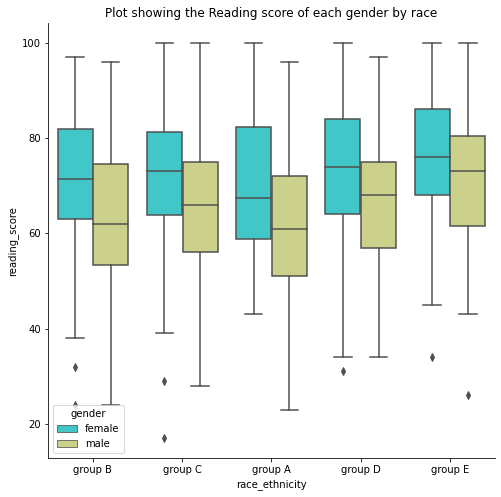

In [20]:
ax = plt.figure(figsize = (8,8))
ax = sn.boxplot(x = 'race_ethnicity', y ='reading_score', hue = 'gender',palette = 'rainbow', data= perform)
ax = sn.despine()
ax = plt.title('Plot showing the Reading score of each gender by race')
plt.show()

This shows that female students perform better at reading tests than male students. 

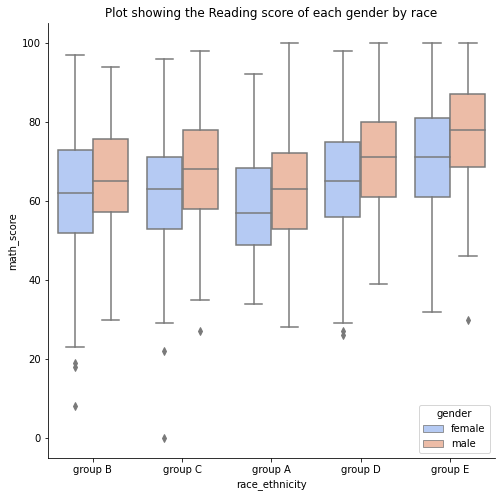

In [23]:
ax = plt.figure(figsize = (8,8))
ax = sn.boxplot(x = 'race_ethnicity', y ='math_score', hue = 'gender',palette = 'coolwarm', data= perform)
ax = sn.despine()
ax = plt.title('Plot showing the Math score of each gender by race')
plt.show()

The median for males is higher than females. From this data, male students perform better at math than female students

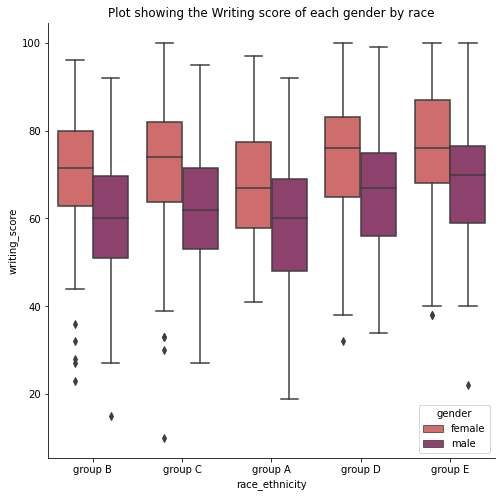

In [25]:
ax = plt.figure(figsize = (8,8))
ax = sn.boxplot(x = 'race_ethnicity', y ='writing_score', hue = 'gender',palette = 'flare', data= perform)
ax = sn.despine()
ax = plt.title('Plot showing the Writing score of each gender by race')
plt.show()

The median score for female students is higher than those of male students. We can conclude on an average than female doe better at writing than males from this dataset.

<a id ='scatterplot'></a>
# Scatter Plots

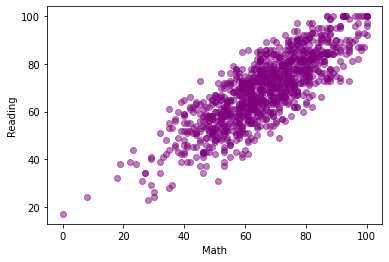

In [33]:
plt.scatter(perform['math_score'], perform['reading_score'], color = 'purple', alpha = 0.5)
plt.xlabel('Math')
plt.ylabel('Reading')
plt.show()

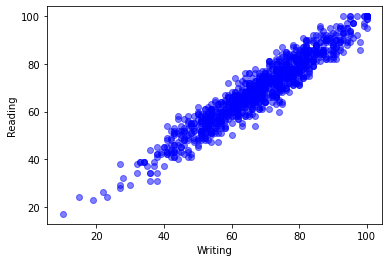

In [34]:
plt.scatter(perform['writing_score'], perform['reading_score'], color = 'blue', alpha = 0.5)
plt.xlabel('Writing')
plt.ylabel('Reading')
plt.show()

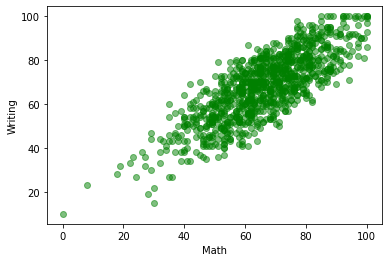

In [35]:
plt.scatter(perform['math_score'], perform['writing_score'], color = 'green', alpha = 0.5)
plt.xlabel('Math')
plt.ylabel('Writing')
plt.show()

This shows a positive correlation between all the test scores. Meaning if a student passes one test, he /she is likely to pass the others

## <a href = '#top' style = 'text-decoration: none'>Back to the top</a>